In [2]:
import csv 
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

from IPython.display import display
import plotly.io as pio
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [4]:
import ipywidgets as widgets

In [24]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


## 1. Load dữ liệu

In [25]:
df = pd.read_csv('car.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [27]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8084 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               8084 non-null   object 
 1   Model              8084 non-null   object 
 2   Year               8084 non-null   int64  
 3   Engine Fuel Type   8084 non-null   object 
 4   Engine HP          8084 non-null   float64
 5   Engine Cylinders   8084 non-null   float64
 6   Transmission Type  8084 non-null   object 
 7   Driven_Wheels      8084 non-null   object 
 8   Number of Doors    8084 non-null   float64
 9   Market Category    8084 non-null   object 
 10  Vehicle Size       8084 non-null   object 
 11  Vehicle Style      8084 non-null   object 
 12  highway MPG        8084 non-null   int64  
 13  city mpg           8084 non-null   int64  
 14  Popularity         8084 non-null   int64  
 15  MSRP               8084 non-null   int64  
dtypes: float64(3), int64(5)

In [28]:
N = range(len(df.columns))
for i in N:
    df_i  = df.iloc[:,i].value_counts()
    print(df_i.name,':', len(df_i))

Make : 47
Model : 713
Year : 28
Engine Fuel Type : 8
Engine HP : 327
Engine Cylinders : 9
Transmission Type : 5
Driven_Wheels : 4
Number of Doors : 3
Market Category : 70
Vehicle Size : 3
Vehicle Style : 16
highway MPG : 44
city mpg : 50
Popularity : 47
MSRP : 4644


In [29]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8.084000e+03
mean,2012.058634,274.642751,5.778080,3.414151,26.650915,19.553686,1499.397823,5.007267e+04
std,6.317981,115.003475,1.886088,0.898087,7.720473,7.159964,1413.855615,7.029313e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2010.000000,192.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.591875e+04
50%,2015.000000,264.000000,6.000000,4.000000,26.000000,18.000000,1013.000000,3.500500e+04
75%,2016.000000,320.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.872250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


interactive(children=(Dropdown(description='thongso', options=('Make', 'Market Category'), value='Make'), Drop…

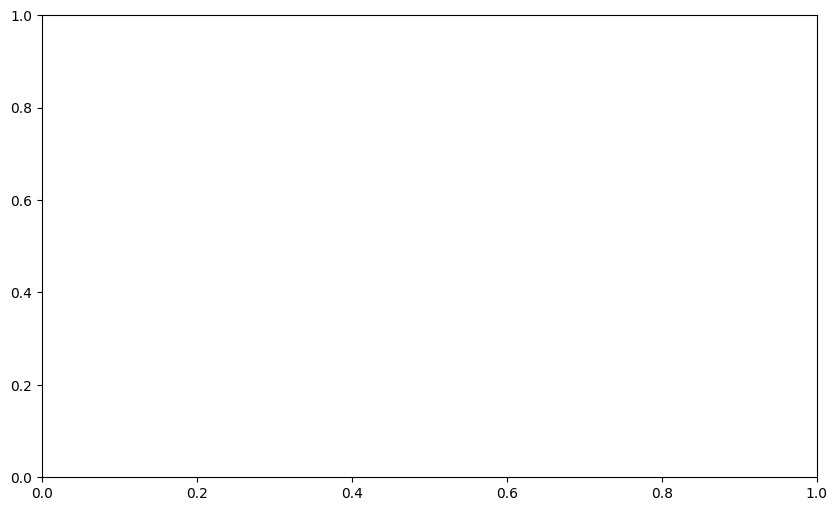

In [30]:
import squarify
cmaps = ['YlOrRd', 'tab20', 'tab20b', 'viridis', 'prism']
@widgets.interact(thongso=['Make', 'Market Category'], ColorMap=cmaps)
def SoSanh1(thongso,ColorMap=None):
    df_counts = df[thongso].value_counts()
    df_counts_values = df_counts.nlargest(10)
    
    fig = plt.figure(figsize=[22,6])
    ax1 = fig.add_subplot(1,2,1)
    squarify.plot(sizes=df_counts_values, label=df_counts.index)
    plt.axis('off')
    plt.show()
    plt.close('all')
    
    ax2 = fig.add_subplot(1,2,2)
    ax = df_counts_values.plot.bar(x=df_counts.index, y=df_counts_values, width=0.8, figsize=(8,6), legend=None, rot=-45)
    ax.bar_label(container=ax.containers[0], label_type='center', fontsize=9, rotation=45)
    ax.set_xticklabels(df_counts_values.index, ha='left')
    ax.set_title('10 hãng xe bán chạy nhất')
    plt.show()
    plt.close('all')


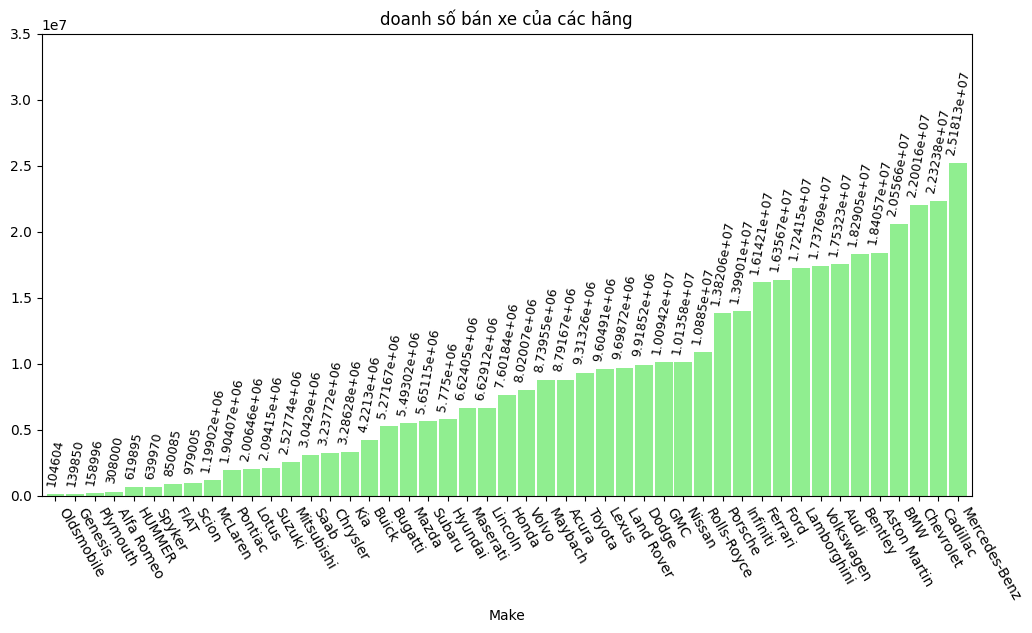

In [11]:
df_sum1_MSRP = df[['Make','MSRP']].groupby('Make').sum()
df_sum1_MSRP = df_sum1_MSRP.sort_values(by='MSRP', ascending=True)
df_sum1_MSRP = df_sum1_MSRP.reset_index()
ax = df_sum1_MSRP.plot.bar(x='Make', y='MSRP', width=0.9, figsize=(12,6), color='lightgreen', legend=None, rot=-60)

ax.bar_label(container=ax.containers[0], label_type='edge', fontsize=9, rotation=80, padding=5)

ax.set_xticks(df_sum1_MSRP.index)
ax.set_xticklabels(df_sum1_MSRP['Make'], ha='left')
ax.set_title('doanh số bán xe của các hãng')
ax.set_ylim([0,35e6])
plt.show()
plt.close('all')

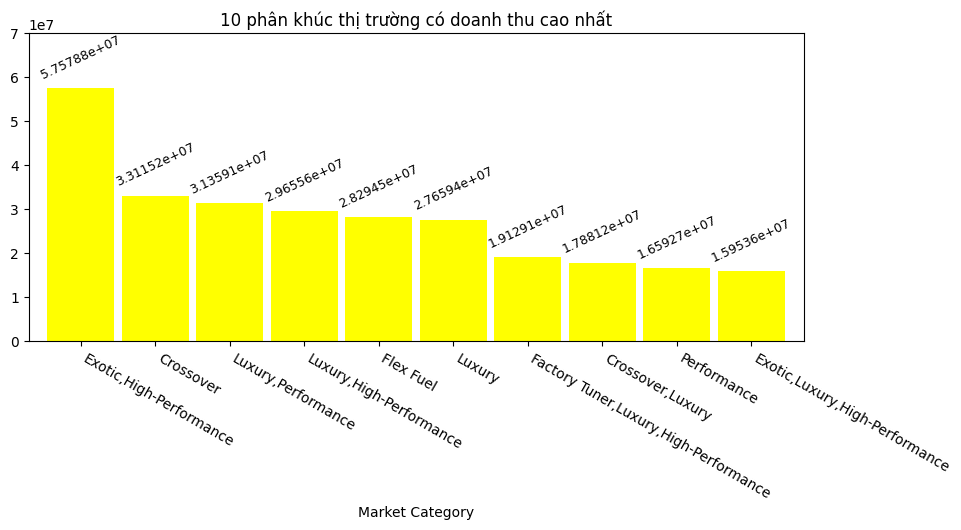

In [12]:
df_sum1_MSRP = df[['Market Category','MSRP']].groupby('Market Category').sum()
df_sum1_MSRP = df_sum1_MSRP.reset_index()
df_sum1_MSRP = df_sum1_MSRP.sort_values(by='MSRP', ascending=True)
df_sum1_MSRP = df_sum1_MSRP.nlargest(10,columns='MSRP')
ax = df_sum1_MSRP.plot.bar(x='Market Category', y='MSRP', width=0.9, figsize=(10,4), color='yellow', legend=None, rot=-30)

ax.bar_label(container=ax.containers[0], label_type='edge', fontsize=9, rotation=25, padding=5)

ax.set_xticks(range(0,10))
ax.set_xticklabels(df_sum1_MSRP['Market Category'],ha='left')
ax.set_title('10 phân khúc thị trường có doanh thu cao nhất')
ax.set_ylim([0,70000000])
plt.show()
plt.close('all')

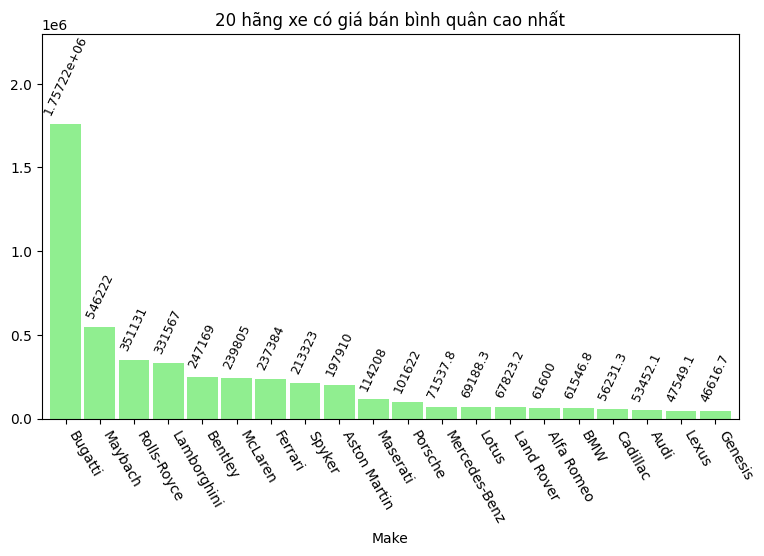

In [13]:
d = df[['Make','MSRP']].groupby('Make')
d = d.mean().sort_values(by='MSRP',ascending=False).reset_index()
d = d.nlargest(20,columns='MSRP')
d.head(20)

ax = d.plot.bar(x='Make', y='MSRP', width=0.9, figsize=(9,5), color='lightgreen', legend=None, rot=-60)

ax.bar_label(container=ax.containers[0], label_type='edge', fontsize=9, rotation=65, padding=5)

ax.set_xticks(d.index)
ax.set_xticklabels(d['Make'], ha='left')
ax.set_title('20 hãng xe có giá bán bình quân cao nhất')
ax.set_ylim([0,2300000])
plt.show()
plt.close('all')

In [14]:
df = pd.read_csv('car.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Khảo sát các thông số kỹ thuật

In [15]:
@widgets.interact(thongso=['Engine Fuel Type', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors','Vehicle Size','Vehicle Style'])
def SoSanh1(thongso):
    df_counts = df[thongso].value_counts()
    #print(df_counts)
    fig = make_subplots(rows=1, cols=2, 
                        subplot_titles=("So Sánh Theo Tổng Số", "So Sánh Theo Tỷ Lệ"), 
                        column_widths=[1.2, 0.8],
                        specs=[[{"type": "xy"}, {"type": "domain"}]]
                       )
    
    goBar = go.Bar(x=df_counts.index, y=df_counts.values, 
                   width=0.5,
                   #marker=dict(color=['orange','lightgreen','lightblue']),
                   showlegend=False
                  )
    
    goPie = go.Pie(labels=df_counts.index, values=df_counts.values,
                   #textinfo='label+percent',
                   showlegend=True,
                   hole=.3,
                   #marker=dict(colors=['orange','lightgreen','lightblue'])
                  )
    
    fig.add_trace(goBar, row=1, col=1)
    fig.add_trace(goPie, row=1, col=2)
    fig.update_layout(width=1200, height=600, title=f'BIỂU ĐỒ SO SÁNH: {thongso}')
    fig.show()
# SoSanh1('Payment')

interactive(children=(Dropdown(description='thongso', options=('Engine Fuel Type', 'Engine Cylinders', 'Transm…

In [16]:
@widgets.interact(thongso=['Engine HP', 'highway MPG', 'city mpg'])
def SoSanh1(thongso):
    new_column1 = df_counts = df[thongso]
    fig, ax = plt.subplots(figsize=(10,5), num=1)
    ax.hist(new_column1, bins=100, color='lightgreen')
    ylim1, ylim2 = ax.get_ylim()
    
    ci95 = np.percentile(new_column1, [2.5, 97.5])
    mean = new_column1.mean()
    median = new_column1.median() 
    # Dùng hàm axvline để vẽ đường thẳng đứng
    ax.axvline(ci95[0], color='r', linestyle='dashed', linewidth=1)
    ax.axvline(ci95[1], color='r', linestyle='dashed', linewidth=1)
    ax.text(ci95[0]-10, 300, f"ci95:\n{ci95[0]:.2f}", color="r")
    ax.text(ci95[1]+2, 300, f"ci95:\n{ci95[1]:.2f}", color="r")

    
    ax.axvline(mean, color='k', linestyle='dashed', linewidth=1)
    ax.text(mean+2, 500, f"Mean:\n{mean:.2f}", color="k")
    #ax.text(mean, 60, 'Mean: %f'%(mean))

    ax.axvline(median, color='b', linestyle='dashed', linewidth=1)
    ax.text(median-15, 700, f"Median:\n{median:.2f}", color="b")
        
    
    plt.xlabel('Giá trị thông số',fontsize = 10)
    plt.ylabel('Tần số',fontsize=10)
    plt.grid(True)
    plt.show()

interactive(children=(Dropdown(description='thongso', options=('Engine HP', 'highway MPG', 'city mpg'), value=…

## Dựa báo số lượng xe bán vs doanh thu năm tiếp theo

In [17]:
df_y = df[['Year','MSRP']].groupby('Year').sum()
df_y = df_y.reset_index()
df_y

,Year,MSRP
0,1990,248485
1,1991,316260
2,1992,367760
3,1993,457151
4,1994,376861
5,1995,351915
6,1996,327155
7,1997,543412
8,1998,458242
9,1999,371539


In [18]:
hs_a, hs_b = np.polyfit(df_y['Year'],df_y['MSRP'], deg=1)
print(hs_a, hs_b)

2498559.134920568 -4988590166.206213


In [19]:
def Ve_phuong_trinh(heso_a, heso_b, mau='red'):
    x1,x2 = 50, 250
    
    y1 = heso_a*x1 + heso_b
    y2 = heso_a*x2 + heso_b
    plt.plot([x1,x2],[y1,y2], color=mau)

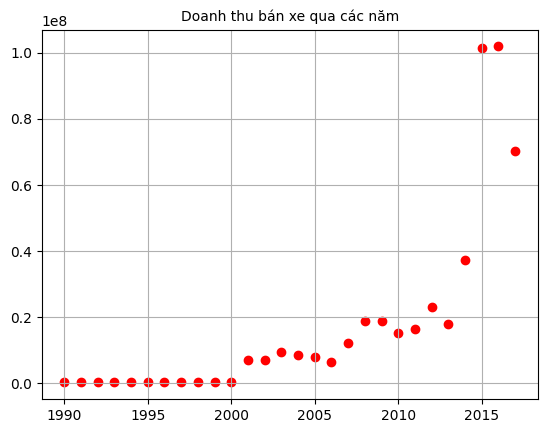

In [20]:
#fig = plt.figure(figsize=(9,6))
#plt.ylim([200, 2000])

plt.scatter(df_y['Year'], df_y['MSRP'], color="r")
plt.title('Doanh thu bán xe qua các năm',fontsize = 10)
plt.grid(True)
#Ve_phuong_trinh(hs_a, hs_b, mau="red")

plt.show()

In [21]:
df_y = df[['Year']].groupby('Year').value_counts()
df_y = df_y.reset_index().rename({0: 'Counts'}, axis=1)
df_y

,Year,Counts
0,1990,123
1,1991,152
2,1992,177
3,1993,209
4,1994,163
5,1995,135
6,1996,131
7,1997,175
8,1998,154
9,1999,120


In [22]:
hs_a, hs_b = np.polyfit(df_y['Year'],df_y['Counts'], deg=1)
print(hs_a, hs_b)

44.89326765188715 -89518.16174055585


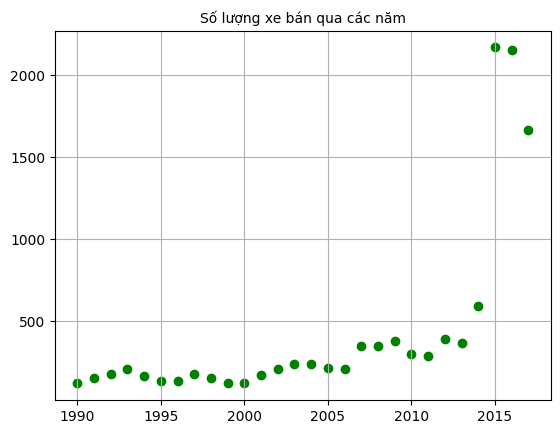

In [23]:
plt.scatter(df_y['Year'], df_y['Counts'], color="green")
plt.title('Số lượng xe bán qua các năm',fontsize = 10)
#Ve_phuong_trinh(hs_a, hs_b, mau="red")
plt.grid(True)
plt.show()